# Project

In this project, my aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>CHIBUEZE C. IGWE</h2>

### Outline:
- A. Basic library and dataset importation
        1. dataset detailed information and Summary statistics
- B. Exploratory Data Analysis 
        1. data distribution
        2. Checking for outliers
        3. Relationships between features
- C. Data Preprocessing
        1. Checking for null/missing values
        2. Checking for duplicate values
        3. data split into train and test data
- D. Machine Learning Application
        1. Model 1 - Support Vector Machine
        2. Model 2 - Decision tree
        3. Model 3 - K Nearest Neighbors
- E. Model Evaluation and Recommendations

# A: Import basic libraries and dataset

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("winequality.csv")

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# 1. Detailed information about the given dataset 
<h7>i. Except the label which is an integer datatype, other features are floats.<h7>
<h7>ii. The dataset has 1599 observations and 12 features or attributes</h7>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Summary statistics
<h7>Summary statistics showed that the standard deviation of chloride and density showed a near zero variation between values. Features with such values are usually poor predictors and thus will be dropped during data preprocessing.</h7>

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# B. Exploratory Data Analysis 
<h6>1. Distribution of the data</h6>

In [9]:
#display of the values of each category in "quality" attribute
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

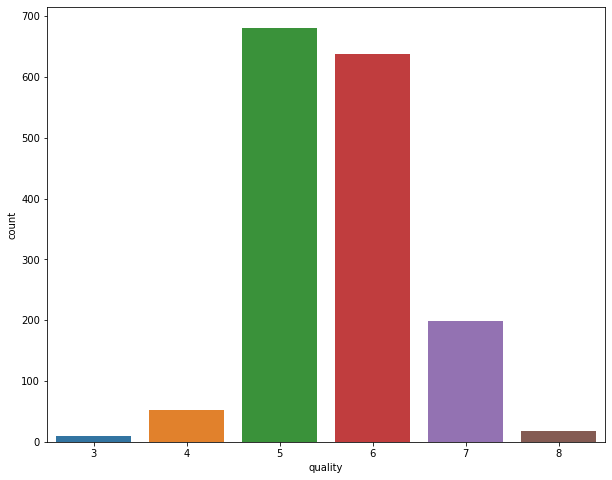

In [10]:
#Countplot to visualize label distribution
plt.figure(figsize=(10,8))
sns.countplot(data["quality"])

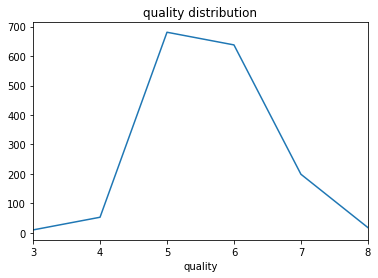

In [11]:
#c: visualization of the normalcy of the distribution of the target data
grouped_quality = data.groupby("quality").size()
grouped_quality.plot(title="quality distribution")

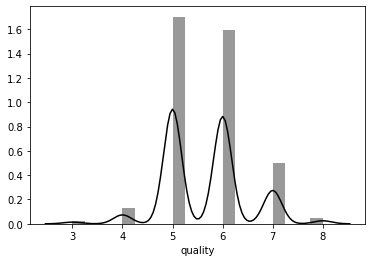

In [12]:
#Distplot showing the multiple distributions of the target data
sns.distplot(data["quality"], bins=20, color="k")

<h4>Note: The distribution plot showed that the target data has a normal distribution with multiple mean and variance</h4>

###### 2. Checking for outliers

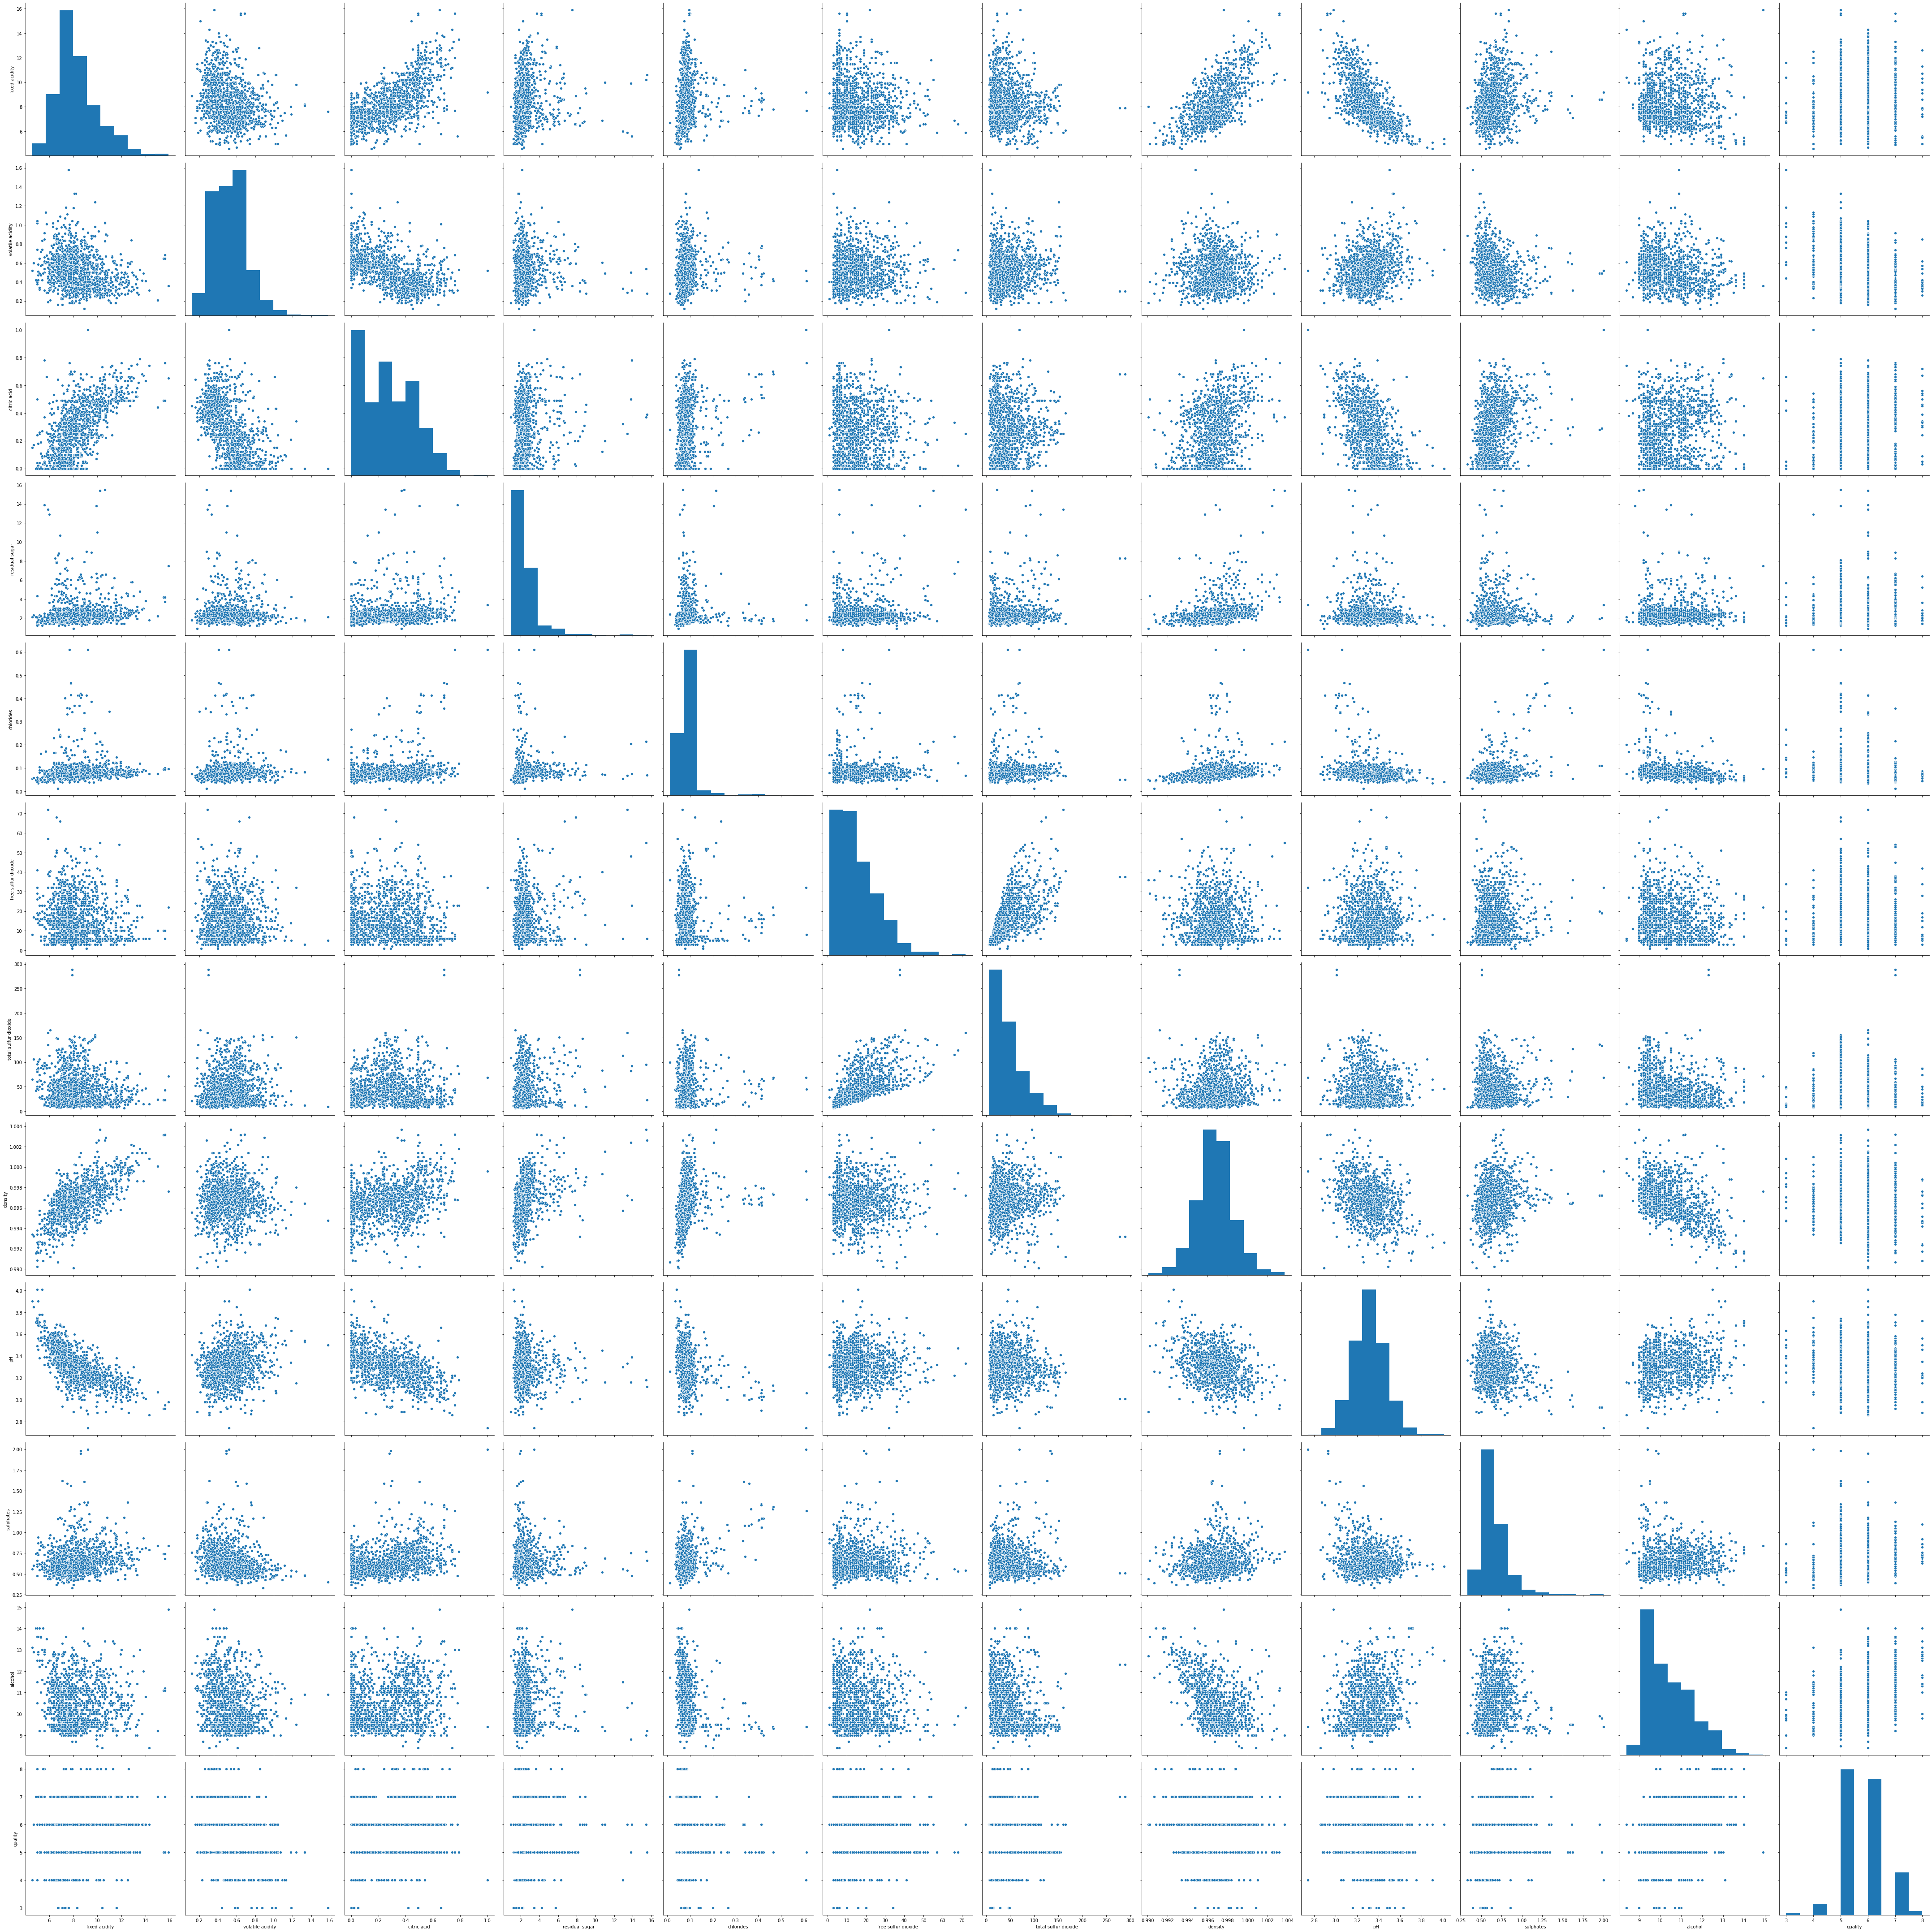

In [13]:
#Scatterplot matrix to check for outliers
sns.pairplot(data, height=5)
plt.tight_layout()


**Note**: i. Positive linear relationship exist between fixed acid and density. ii. Density and pH seems to have normal distribution. iii. residual sugar and chlorides contain several outliers

###### 3.Relationship between features

In [14]:
#Pearson product-moment coefficient correlation

data_corr = data.corr()["quality"][:-1]

data_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

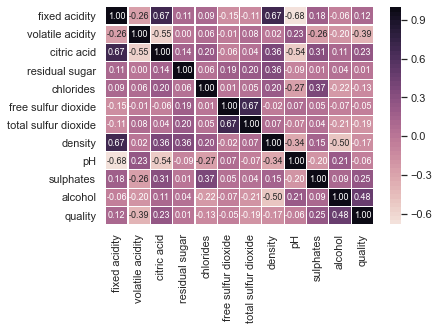

In [15]:
#Heatmap visualization of the correlation between features
sns.set(font_scale=1.0)
data_heatmap2= sns.heatmap(data.corr(),
                          cmap=sns.cubehelix_palette(50, light=0.90,
                                                     dark=0.05),
                           linewidth=0.05, annot=True, annot_kws={"size": 9},
                           fmt=".2f", square=False)

# C. Data Preprocessing

In [16]:
#1. checking for null values across features
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
#2. No duplicate values in the dataset
drop_dup = data.drop_duplicates(keep="first", inplace=True)
print(drop_dup)

None


##### Creating new feature named "quality_category"

In [18]:
#categorizing quantity 
def quality_categorized(x):
    if 3<=x<5:
        return "bad"
    elif 5<=x<7:
        return "medium"
    else:
        return "good"

In [19]:
data["quality_category"] = data.quality.apply(quality_categorized)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium


In [23]:
grouped_data = data["quality_category"].value_counts()

grouped_data

medium    1112
good       184
bad         63
Name: quality_category, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()

data["label"] = label_encoder.fit_transform(data["quality_category"])

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium,2


In [47]:
categories = list(label_encoder.inverse_transform([0, 1, 2]))

categories

['bad', 'good', 'medium']

In [26]:
data_copy = data.drop(axis=1, labels=["quality", "quality_category"])

data_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [27]:
#Normalizing features
scaler = StandardScaler()
scaler.fit(data_copy)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#3. import train_test_split and Split Train and Test dataset by 70% to 30%
from sklearn.model_selection import train_test_split

X, y = data_copy.iloc[:, :-1], data_copy.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1229,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3
1357,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1
987,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4


# D. ML Application

<h3>Model 1: Support Vector Machine</h3>

In [29]:
## 1.1: import model and other libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

#1.2: call up and fit model
svm = SVC(kernel="rbf", C=1, random_state=1, gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
#1.3: Model evaluation using accuracy, precision, recall and F1 scores
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("accuracy = {:.1f}%".format(acc*100))
print("Precision = {:.1f}%".format(prec*100))
print("Recall = {:.1f}%".format(recall*100))
print("F1_score = {:.1f}".format(f1*100))

accuracy = 84.1%
Precision = 43.5%
Recall = 36.2%
F1_score = 36.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.45      0.10      0.17        49
           2       0.85      0.98      0.91       344

    accuracy                           0.84       408
   macro avg       0.44      0.36      0.36       408
weighted avg       0.77      0.84      0.79       408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(185.30000000000013, 0.5, 'True Labels')

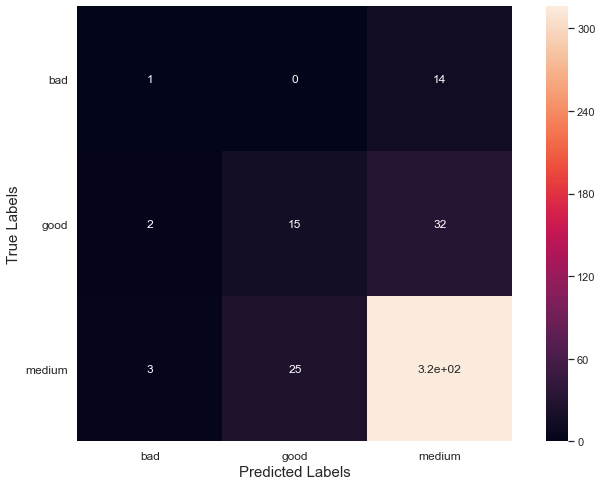

In [48]:
#1.4: Generating confusion matrix
cmat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax =sns.heatmap(cmat, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

## Model 2: Decision Tree

In [49]:
#2.1: import model

from sklearn.tree import DecisionTreeClassifier

In [50]:
#2.2: call up and fit model
clf = DecisionTreeClassifier(max_depth=9, max_features = 6,
                             min_samples_split=3, random_state=35)

clf.fit(X_train, y_train)

print("Accuracy of train = {:.1f}%".format(clf.score(X_train, y_train)*100))
print("Accuracy of test = {:.1f}%".format(clf.score(X_test, y_test)*100))

Accuracy of train = 93.1%
Accuracy of test = 78.4%


**Bias for training** = 100-93.1 = 6.9%  
**Bias for test** = 100-78.4 = 21.6%   

**Variance** = test bias - training bias = 4.7%  

In [51]:
#2.3: Model evaluation using accuracy, precision, recall and F1 scores

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy score = {:.1f}%".format(acc*100))
print("Precision score = {:.1f}%".format(prec*100))
print("Recall score = {:.1f}%".format(recall*100))
print("F1 score = {:.1f}%".format(f1*100))


Accuracy score = 78.4%
Precision score = 47.3%
Recall score = 50.4%
F1 score = 48.5%


Text(185.30000000000013, 0.5, 'Actual values')

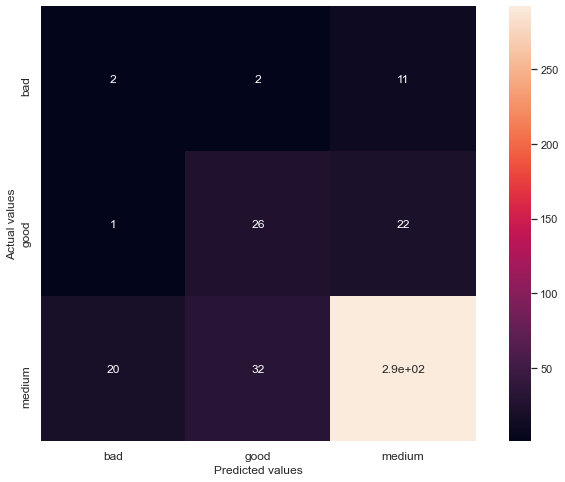

In [52]:
#2.4: Generating confusion matrix

cmat2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
ax = sns.heatmap(cmat2, annot=True, cbar=True, square=True)
ax.xaxis.set_ticklabels(categories, fontsize=12)
ax.yaxis.set_ticklabels(categories, fontsize=12)
ax.set_xlabel("Predicted values", fontsize=12)
ax.set_ylabel("Actual values", fontsize=12)

## Model 3: K Nearest Neighbors (KNN)

In [53]:
#3.1: import model

from sklearn.neighbors import KNeighborsClassifier

In [54]:
#3.2: Call up and fit model

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [55]:
#3.3: Model evaluation using accuracy, precision, recall and F1 scores

y_pred = knn.predict(X_test)

acc3 = accuracy_score(y_test, y_pred)
prec3 = precision_score(y_test, y_pred, average = "macro")
recall3 = recall_score(y_test, y_pred, average = "macro")
F1_3 = f1_score(y_test, y_pred, average = "macro")

print("Accuracy score = {:.1f}%".format(acc3*100))
print("Precision score = {:.1f}%".format(prec3*100))
print("Recall score = {:.1f}%".format(recall3*100))
print("F1 score = {:.1f}%".format(F1_3*100))

Accuracy score = 81.4%
Precision score = 47.2%
Recall score = 43.0%
F1 score = 44.3%


Text(79.46000000000004, 0.5, 'Actual value')

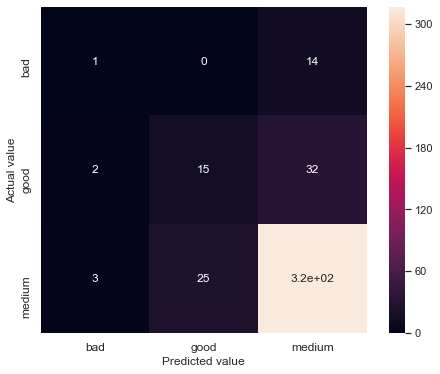

In [56]:
#3.4: Generating confusion matrix
cmat3 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
ax = sns.heatmap(cmat3, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(categories, fontsize=12)
ax.yaxis.set_ticklabels(categories, fontsize=12)
ax.set_xlabel("Predicted value", fontsize=12)
ax.set_ylabel("Actual value", fontsize=12)

In [ ]:
#Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# E. Model Evaluation

In [45]:
#Select the best performing model and write your comments about why choose this model.

row1 = [84.1, 78.4, 81.4]
row2 = [43.5, 47.3, 47.2]
row3 = [36.2, 50.4, 43.0]
row4 = [36.0, 48.5, 44.3]

data_ = [row1, row2, row3, row4]

model_score = pd.DataFrame(data_, index=["Accuracy score", "Precision score", "Recall score",
                                         "F1 score"], columns=["Support Vector Machine (%)",
                                                               "Decision Tree (%)", "KNN (%)"])

model_score

,Support Vector Machine (%),Decision Tree (%),KNN (%)
Accuracy score,84.1,78.4,81.4
Precision score,43.5,47.3,47.2
Recall score,36.2,50.4,43.0
F1 score,36.0,48.5,44.3


**From the table above,** the Decision tree performed best in predicting the quality of wine with comparable accuracy, good recall, precision and F1 score when compared with the other two models. Going forward, the model can be improved through dimentionality reduction.